# Customer Churn Prediction using Machine Learning

## Import

In [59]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay

In [2]:
# Load dataset
df = pd.read_csv("tech_task_dataset.csv")

## Explore

In [3]:
# Explore dataset
print("Dataset Overview:")
print(df.head())

Dataset Overview:
   Call Failure  Complains  Subscription Length  Charge Amount  \
0           8.0        0.0                 38.0              0   
1           0.0        0.0                  NaN              0   
2          10.0        0.0                 37.0              0   
3          10.0        0.0                 38.0              0   
4           3.0        0.0                 38.0              0   

   Seconds of Use  Frequency of use  Frequency of SMS  \
0          4370.0              71.0               5.0   
1           318.0               5.0               7.0   
2          2453.0              60.0             359.0   
3          4198.0              66.0               NaN   
4             NaN              58.0               NaN   

   Distinct Called Numbers  Churn  
0                     17.0      0  
1                      4.0      0  
2                     24.0      0  
3                     35.0      0  
4                     33.0      0  


In [4]:
print("Data Shape:", df.shape)
print(df.info())

Data Shape: (3150, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call Failure             2524 non-null   float64
 1   Complains                2558 non-null   float64
 2   Subscription Length      2633 non-null   float64
 3   Charge Amount            3150 non-null   int64  
 4   Seconds of Use           2561 non-null   float64
 5   Frequency of use         2479 non-null   float64
 6   Frequency of SMS         2488 non-null   float64
 7   Distinct Called Numbers  2514 non-null   float64
 8   Churn                    3150 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 221.6 KB
None


Check missing values and data types:

In [5]:
print(df.dtypes)
print("Missing Values:")
print(df.isnull().sum())

Call Failure               float64
Complains                  float64
Subscription Length        float64
Charge Amount                int64
Seconds of Use             float64
Frequency of use           float64
Frequency of SMS           float64
Distinct Called Numbers    float64
Churn                        int64
dtype: object
Missing Values:
Call Failure               626
Complains                  592
Subscription Length        517
Charge Amount                0
Seconds of Use             589
Frequency of use           671
Frequency of SMS           662
Distinct Called Numbers    636
Churn                        0
dtype: int64


In [24]:
df.describe()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Churn
count,2524.000000,2558.000000,2633.000000,3150.000000,2561.000000,2479.000000,2488.000000,2514.000000,3150.000000
mean,7.731379,0.076622,32.499810,0.942857,4457.024209,69.052844,73.308682,23.361575,0.157143
std,7.286990,0.266043,8.540095,1.521072,4167.652501,56.910760,112.651426,17.275861,0.363993
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,29.000000,0.000000,1390.000000,27.000000,6.000000,10.000000,0.000000
50%,6.000000,0.000000,35.000000,0.000000,3018.000000,54.000000,21.000000,21.000000,0.000000
75%,12.000000,0.000000,38.000000,1.000000,6458.000000,94.000000,87.250000,33.000000,0.000000
max,36.000000,1.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,1.000000


Another important consideration for model selection is whether there are any issues with multicollinearity in our model. Let's check.

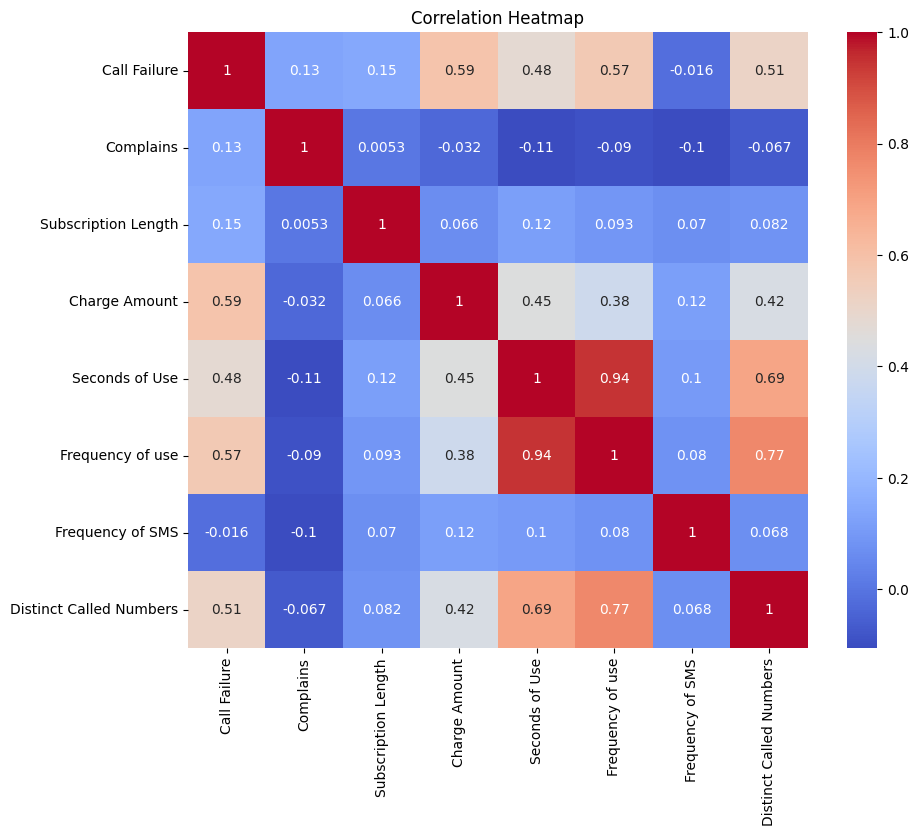

In [6]:
# Check correlation and plot heatmap
corr = df.drop(columns="Churn").corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap="coolwarm", annot=True)
plt.title("Correlation Heatmap")
plt.show()

- The columns "Seconds of Use" and "Frequency of Use" exhibit a high correlation coefficient of 0.94, indicating a strong positive linear relationship between these two variables.

- Additionally, the feature "Frequency of Use" is moderately correlated with "Distinct Called Numbers" with a correlation coefficient of 0.77.

Tree-based models are generally robust to multicollinearity, and they can handle correlated features without a significant negative impact on performance. These models make decisions based on feature splits rather than relying on coefficient estimates, which makes them less sensitive to collinearity issues.

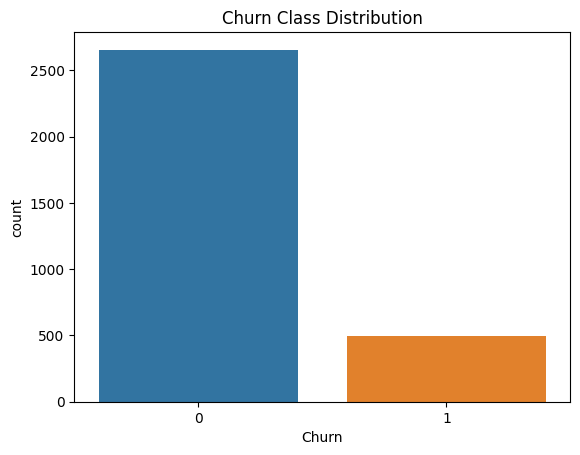

In [7]:
# Visualize class distribution
sns.countplot(data=df, x="Churn")
plt.title("Churn Class Distribution")
plt.show()

It shows us that we have an imbalanced dataset, where our majority class is far bigger than our minority class.

Let's do more EDA:

In [8]:
# Group data by Churn and compute the mean to find out if churners make more complains than non-churners:
print(df.groupby('Churn')['Complains'].mean())

Churn
0    0.016256
1    0.397531
Name: Complains, dtype: float64


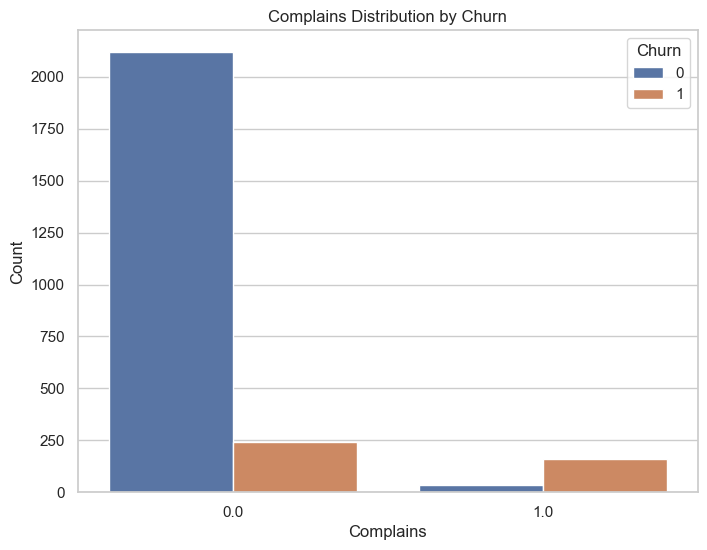

In [27]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Complains', hue='Churn')
plt.title('Complains Distribution by Churn')
plt.xlabel('Complains')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()

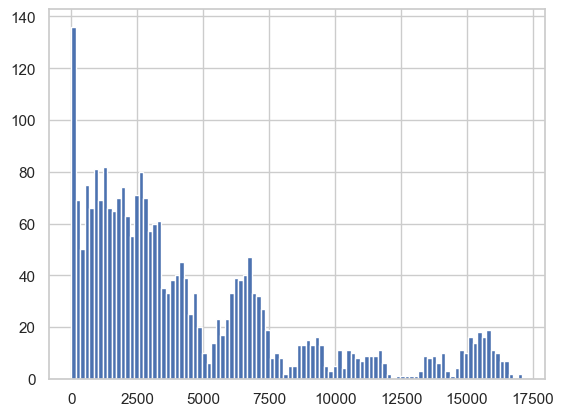

In [28]:
# Visualize the distribution of 'Seconds of Use'
plt.hist(df['Seconds of Use'], bins = 100)

# Display the plot
plt.show()

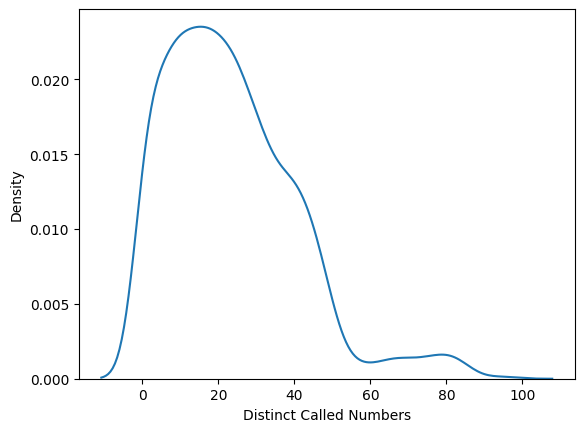

In [11]:
# Visualize the distribution of 'Distinct Called Numbers'
sns.kdeplot(df['Distinct Called Numbers']);

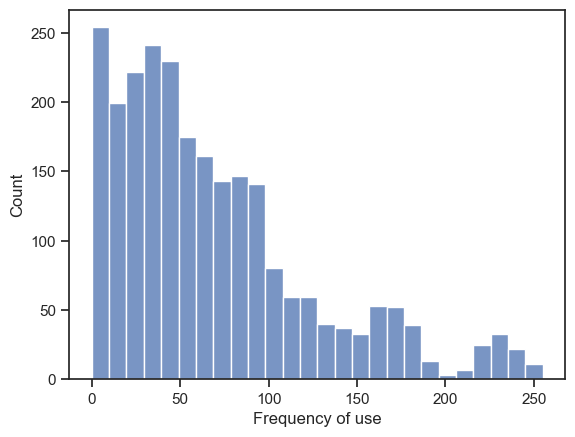

In [16]:
# Visualize the distribution of 'Frequency of use'
sns.set(style = 'ticks');
sns.histplot(df['Frequency of use']);

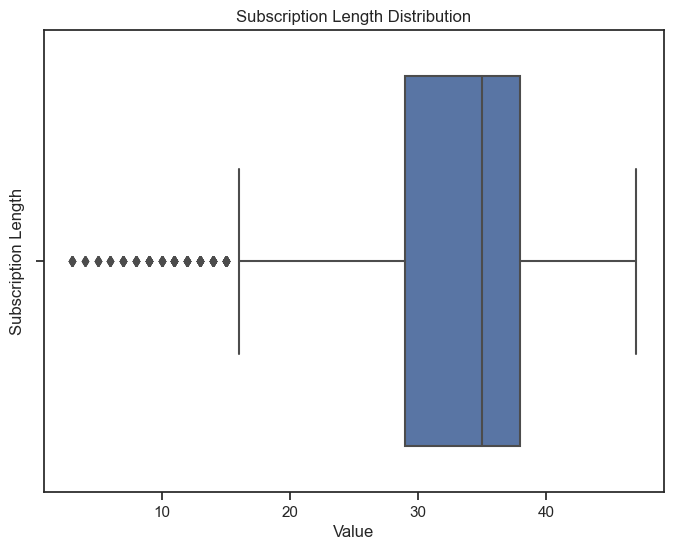

In [21]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Subscription Length', data=df, orient='h')
plt.ylabel('Subscription Length')
plt.xlabel('Value')
plt.title('Subscription Length Distribution')
plt.show()

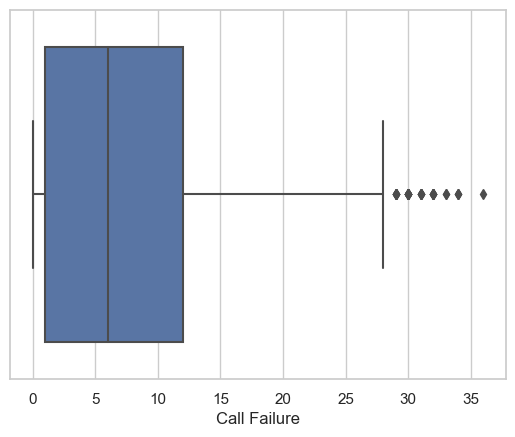

In [23]:
#Plotting Call Failures as a boxplot:
sns.set(style="whitegrid")
sns.boxplot(x = 'Call Failure',data=df, orient='h');

So what did we learn from this EDA? First, our data is imbalanced. This is something we need to address in our data preparation. Second, many of our features have missing values that we'll need to impute. And since the features are highly skewed, the best imputation strategy is likely median, not mean. Finally, we have autocorrelation issues, which means that we should steer clear of linear models, and try a tree-based model instead.

## Split

In [29]:
# Split data
target = "Churn"
X = df.drop(columns=target)
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Resample

In [57]:
# Resample data
over_sampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = over_sampler.fit_resample(X_train, y_train)

## Baseline

In [31]:
# Define baseline accuracy
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 2))

Baseline Accuracy: 0.85


# Build Model

## Decision Tree Classifier

In [32]:
# Build Decision Tree model
model_over = make_pipeline(
    SimpleImputer(strategy="median"),
    DecisionTreeClassifier(random_state=42)
)
model_over.fit(X_train_over, y_train_over)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [33]:
# Evaluate Decision Tree model
acc_train = model_over.score(X_train, y_train)
acc_test = model_over.score(X_test, y_test)
print("Decision Tree Training Accuracy:", round(acc_train, 4))
print("Decision Tree Test Accuracy:", round(acc_test, 4))
print("Decision Tree Classification Report:")
print(classification_report(y_test, model_over.predict(X_test)))

Decision Tree Training Accuracy: 0.9944
Decision Tree Test Accuracy: 0.8873
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       520
           1       0.69      0.65      0.67       110

    accuracy                           0.89       630
   macro avg       0.81      0.79      0.80       630
weighted avg       0.88      0.89      0.89       630



In [35]:
# Get Decision Tree depth
depth = model_over.named_steps["decisiontreeclassifier"].get_depth()
print("Decision Tree Depth:", depth)

Decision Tree Depth: 26


## Gradient Boosting Classifier

In [40]:
# Build Gradient Boosting model
clf_gb = make_pipeline(
    SimpleImputer(),
    GradientBoostingClassifier()
)
clf_gb.fit(X_train_over, y_train_over)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('gradientboostingclassifier', GradientBoostingClassifier())])

In [41]:
# Evaluate Gradient Boosting model
acc_train_gb = clf_gb.score(X_train, y_train)
acc_test_gb = clf_gb.score(X_test, y_test)
print("Gradient Boosting Training Accuracy:", round(acc_train_gb, 4))
print("Gradient Boosting Test Accuracy:", round(acc_test_gb, 4))
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, clf_gb.predict(X_test)))

Gradient Boosting Training Accuracy: 0.904
Gradient Boosting Test Accuracy: 0.8635
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.87      0.91       520
           1       0.57      0.84      0.68       110

    accuracy                           0.86       630
   macro avg       0.77      0.85      0.80       630
weighted avg       0.89      0.86      0.87       630



## Random Forest Classifier

In [44]:
# Build Random Forest model
clf = make_pipeline(
    SimpleImputer(),
    RandomForestClassifier(random_state=42)
)
clf.fit(X_train_over, y_train_over)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [45]:
cv_scores = cross_val_score(clf,X_train_over,y_train_over,cv=5,n_jobs=-1)
print(cv_scores.mean())

0.9756440281030445


In [46]:
params = {
   "simpleimputer__strategy":["mean","median"],
   "randomforestclassifier__n_estimators":range(25,100,25),
   "randomforestclassifier__max_depth":range(10,50,10)
}
params

{'simpleimputer__strategy': ['mean', 'median'],
 'randomforestclassifier__n_estimators': range(25, 100, 25),
 'randomforestclassifier__max_depth': range(10, 50, 10)}

In [47]:
model = GridSearchCV(
   clf,
   param_grid=params,
   cv=5,
   n_jobs=-1,
   verbose=1
)
model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 50, 10),
                         'randomforestclassifier__n_estimators': range(25, 100, 25),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

In [48]:
model.fit(X_train_over, y_train_over)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 50, 10),
                         'randomforestclassifier__n_estimators': range(25, 100, 25),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

In [49]:
cv_results = pd.DataFrame(model.cv_results_)
cv_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestclassifier__max_depth,param_randomforestclassifier__n_estimators,param_simpleimputer__strategy,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.142404,0.020528,0.010943,0.002646,10,25,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",0.940281,0.943794,0.946136,0.940281,0.940281,0.942155,0.002411,21
1,0.142669,0.021748,0.009676,0.001638,10,25,median,"{'randomforestclassifier__max_depth': 10, 'ran...",0.943794,0.942623,0.935597,0.932084,0.929742,0.936768,0.005591,24
2,0.298799,0.018704,0.021167,0.004541,10,50,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",0.943794,0.942623,0.942623,0.946136,0.942623,0.943560,0.001366,19
3,0.295854,0.025166,0.017259,0.004044,10,50,median,"{'randomforestclassifier__max_depth': 10, 'ran...",0.947307,0.941452,0.936768,0.930913,0.928571,0.937002,0.006844,23
4,0.448263,0.051345,0.030936,0.004651,10,75,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",0.947307,0.948478,0.947307,0.940281,0.934426,0.943560,0.005412,19
5,0.497888,0.036885,0.032167,0.003365,10,75,median,"{'randomforestclassifier__max_depth': 10, 'ran...",0.949649,0.939110,0.941452,0.932084,0.927400,0.937939,0.007696,22
6,0.180664,0.021516,0.011333,0.001871,20,25,mean,"{'randomforestclassifier__max_depth': 20, 'ran...",0.966042,0.981265,0.971897,0.976581,0.964871,0.972131,0.006214,14
7,0.204932,0.016559,0.019107,0.008077,20,25,median,"{'randomforestclassifier__max_depth': 20, 'ran...",0.974239,0.976581,0.969555,0.973068,0.963700,0.971429,0.004480,18
8,0.339868,0.013862,0.023823,0.002851,20,50,mean,"{'randomforestclassifier__max_depth': 20, 'ran...",0.967213,0.982436,0.969555,0.976581,0.966042,0.972365,0.006223,13
9,0.371664,0.030632,0.032774,0.009934,20,50,median,"{'randomforestclassifier__max_depth': 20, 'ran...",0.977752,0.977752,0.969555,0.970726,0.967213,0.972600,0.004356,12


In [53]:
best_model = model.best_estimator_

In [55]:
# Evaluate Random Forest model
acc_train_rf = best_model.score(X_train, y_train)
acc_test_rf = best_model.score(X_test, y_test)
print("Random Forest Training Accuracy:", round(acc_train_rf, 2))
print("Random Forest Test Accuracy:", round(acc_test_rf, 2))
print("Random Forest Classification Report:")
print(classification_report(y_test, clf.predict(X_test)))

Random Forest Training Accuracy: 1.0
Random Forest Test Accuracy: 0.9
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       520
           1       0.78      0.60      0.68       110

    accuracy                           0.90       630
   macro avg       0.85      0.78      0.81       630
weighted avg       0.89      0.90      0.89       630



 "Good" accuracy scores don't tell us much about the model's performance when dealing with imbalanced data. So instead of looking at what the model got right or wrong, let's see how its predictions differ for the two classes in the dataset.

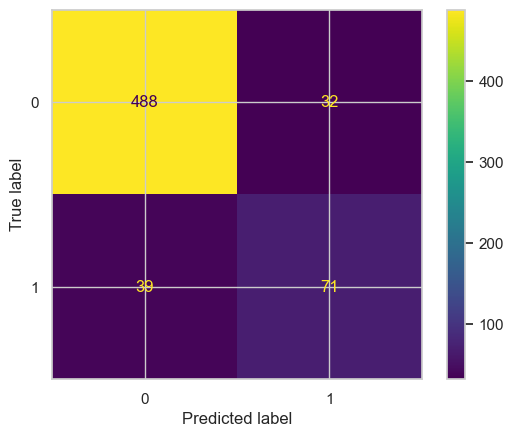

In [43]:
ConfusionMatrixDisplay.from_estimator(model_over,X_test,y_test);

## Communicate

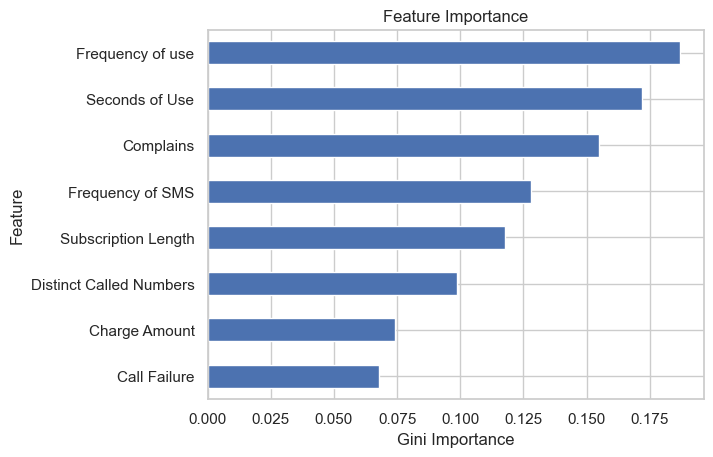

In [56]:
# Get feature names from training data
features = X_train_over.columns
# Extract importances from model
importances = best_model.named_steps["randomforestclassifier"].feature_importances_
# Create a series with feature names and importances
feat_imp =  pd.Series(importances, index=features).sort_values()
# Plot 10 most important features
feat_imp.tail(10).plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");

In [58]:
feat_imp

Call Failure               0.067824
Charge Amount              0.073996
Distinct Called Numbers    0.098706
Subscription Length        0.117861
Frequency of SMS           0.128025
Complains                  0.154860
Seconds of Use             0.171765
Frequency of use           0.186962
dtype: float64

## Conclusion

This project aimed to predict customer churn using three machine learning models: Decision Tree, Random Forest, and Gradient Boosting. After comparing their performance, Random Forest emerged as the most effective model with a test accuracy of 90%. Key findings include:

- Random Forest's Accuracy: 90%
- Precision (Churned): 0.78
- Recall (Churned): 0.60
- F1-Score (Churned): 0.68

While Decision Tree achieved 89% accuracy and Gradient Boosting achieved 86%, Random Forest consistently demonstrated the best performance. Features like 'Seconds of Use', 'Frequency of use', 'Complains', and 'Subscription Length' proved influential in predicting customer churn.

By leveraging Random Forest's accuracy and insights, businesses can make informed decisions to mitigate churn and enhance customer retention strategies. Further optimization and feature engineering could potentially lead to even better results.